In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

sns.set(style="ticks", color_codes=True)


ibm_data = pd.read_csv("ibm.csv")
xyz_data = pd.read_csv("organization.csv")

fields_trim_ibm = ['EmployeeCount', 'Over18', 'EmployeeNumber', 'StandardHours']

#print ibm_data.shape
ibm_data.describe()

#ibm_data.columns
#xyz_data.columns
#print xyz_data.head()
# g = sns.pairplot(dt)
# plt.show()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


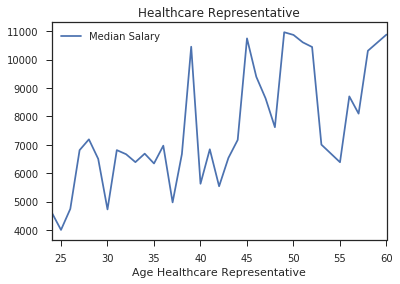

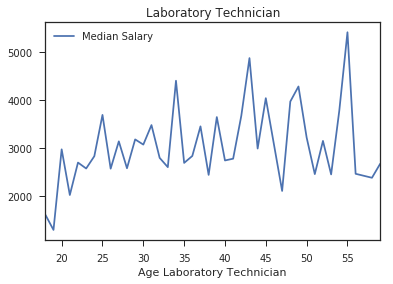

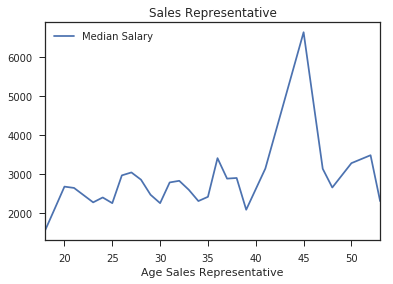

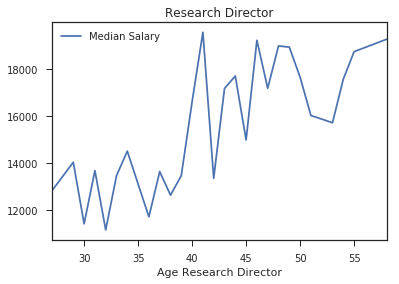

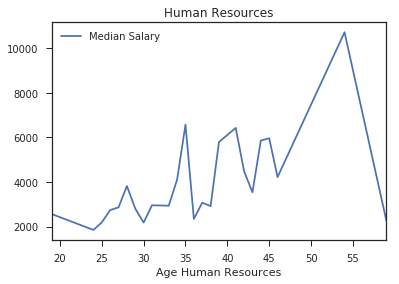

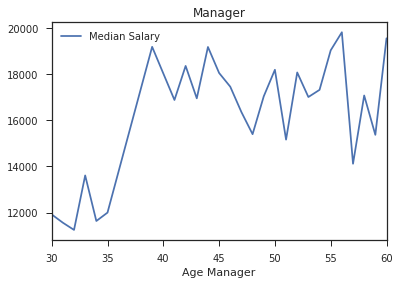

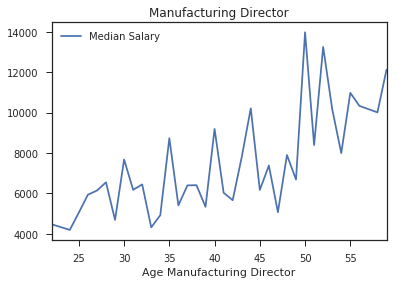

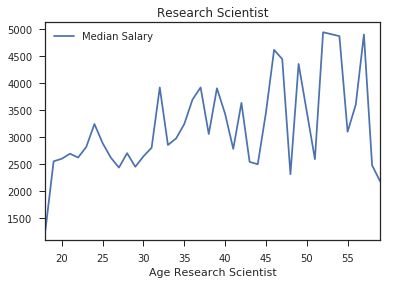

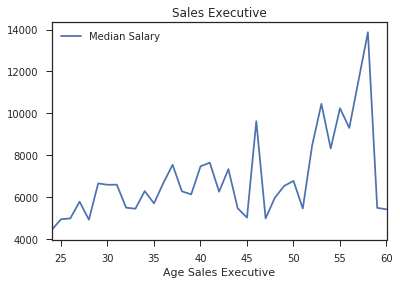

In [3]:
%matplotlib inline
# Employee Salaries by Job Roles
def salary_by_jobrole(df):
    for job in set(df.JobRole):
        agesalary = []
        for i in range(df['Age'].min(), df['Age'].max() + 1):
            agesalary.append([i, df[(df['Age'] == i) & (df['JobRole'] == job)]['MonthlyIncome'].median()])
        agesalary = pd.DataFrame(agesalary, columns=['Age '+job, 'Median Salary'])
        agesalary = agesalary.dropna().reset_index(drop=True)
    
        agesalary.plot(x='Age '+job, y='Median Salary', title=job)

salary_by_jobrole(ibm_data)


In [4]:
#Remove useless columns
ibm_df = copy.deepcopy(ibm_data)

for col in fields_trim_ibm:
    ibm_df = ibm_df.drop(col, 1)


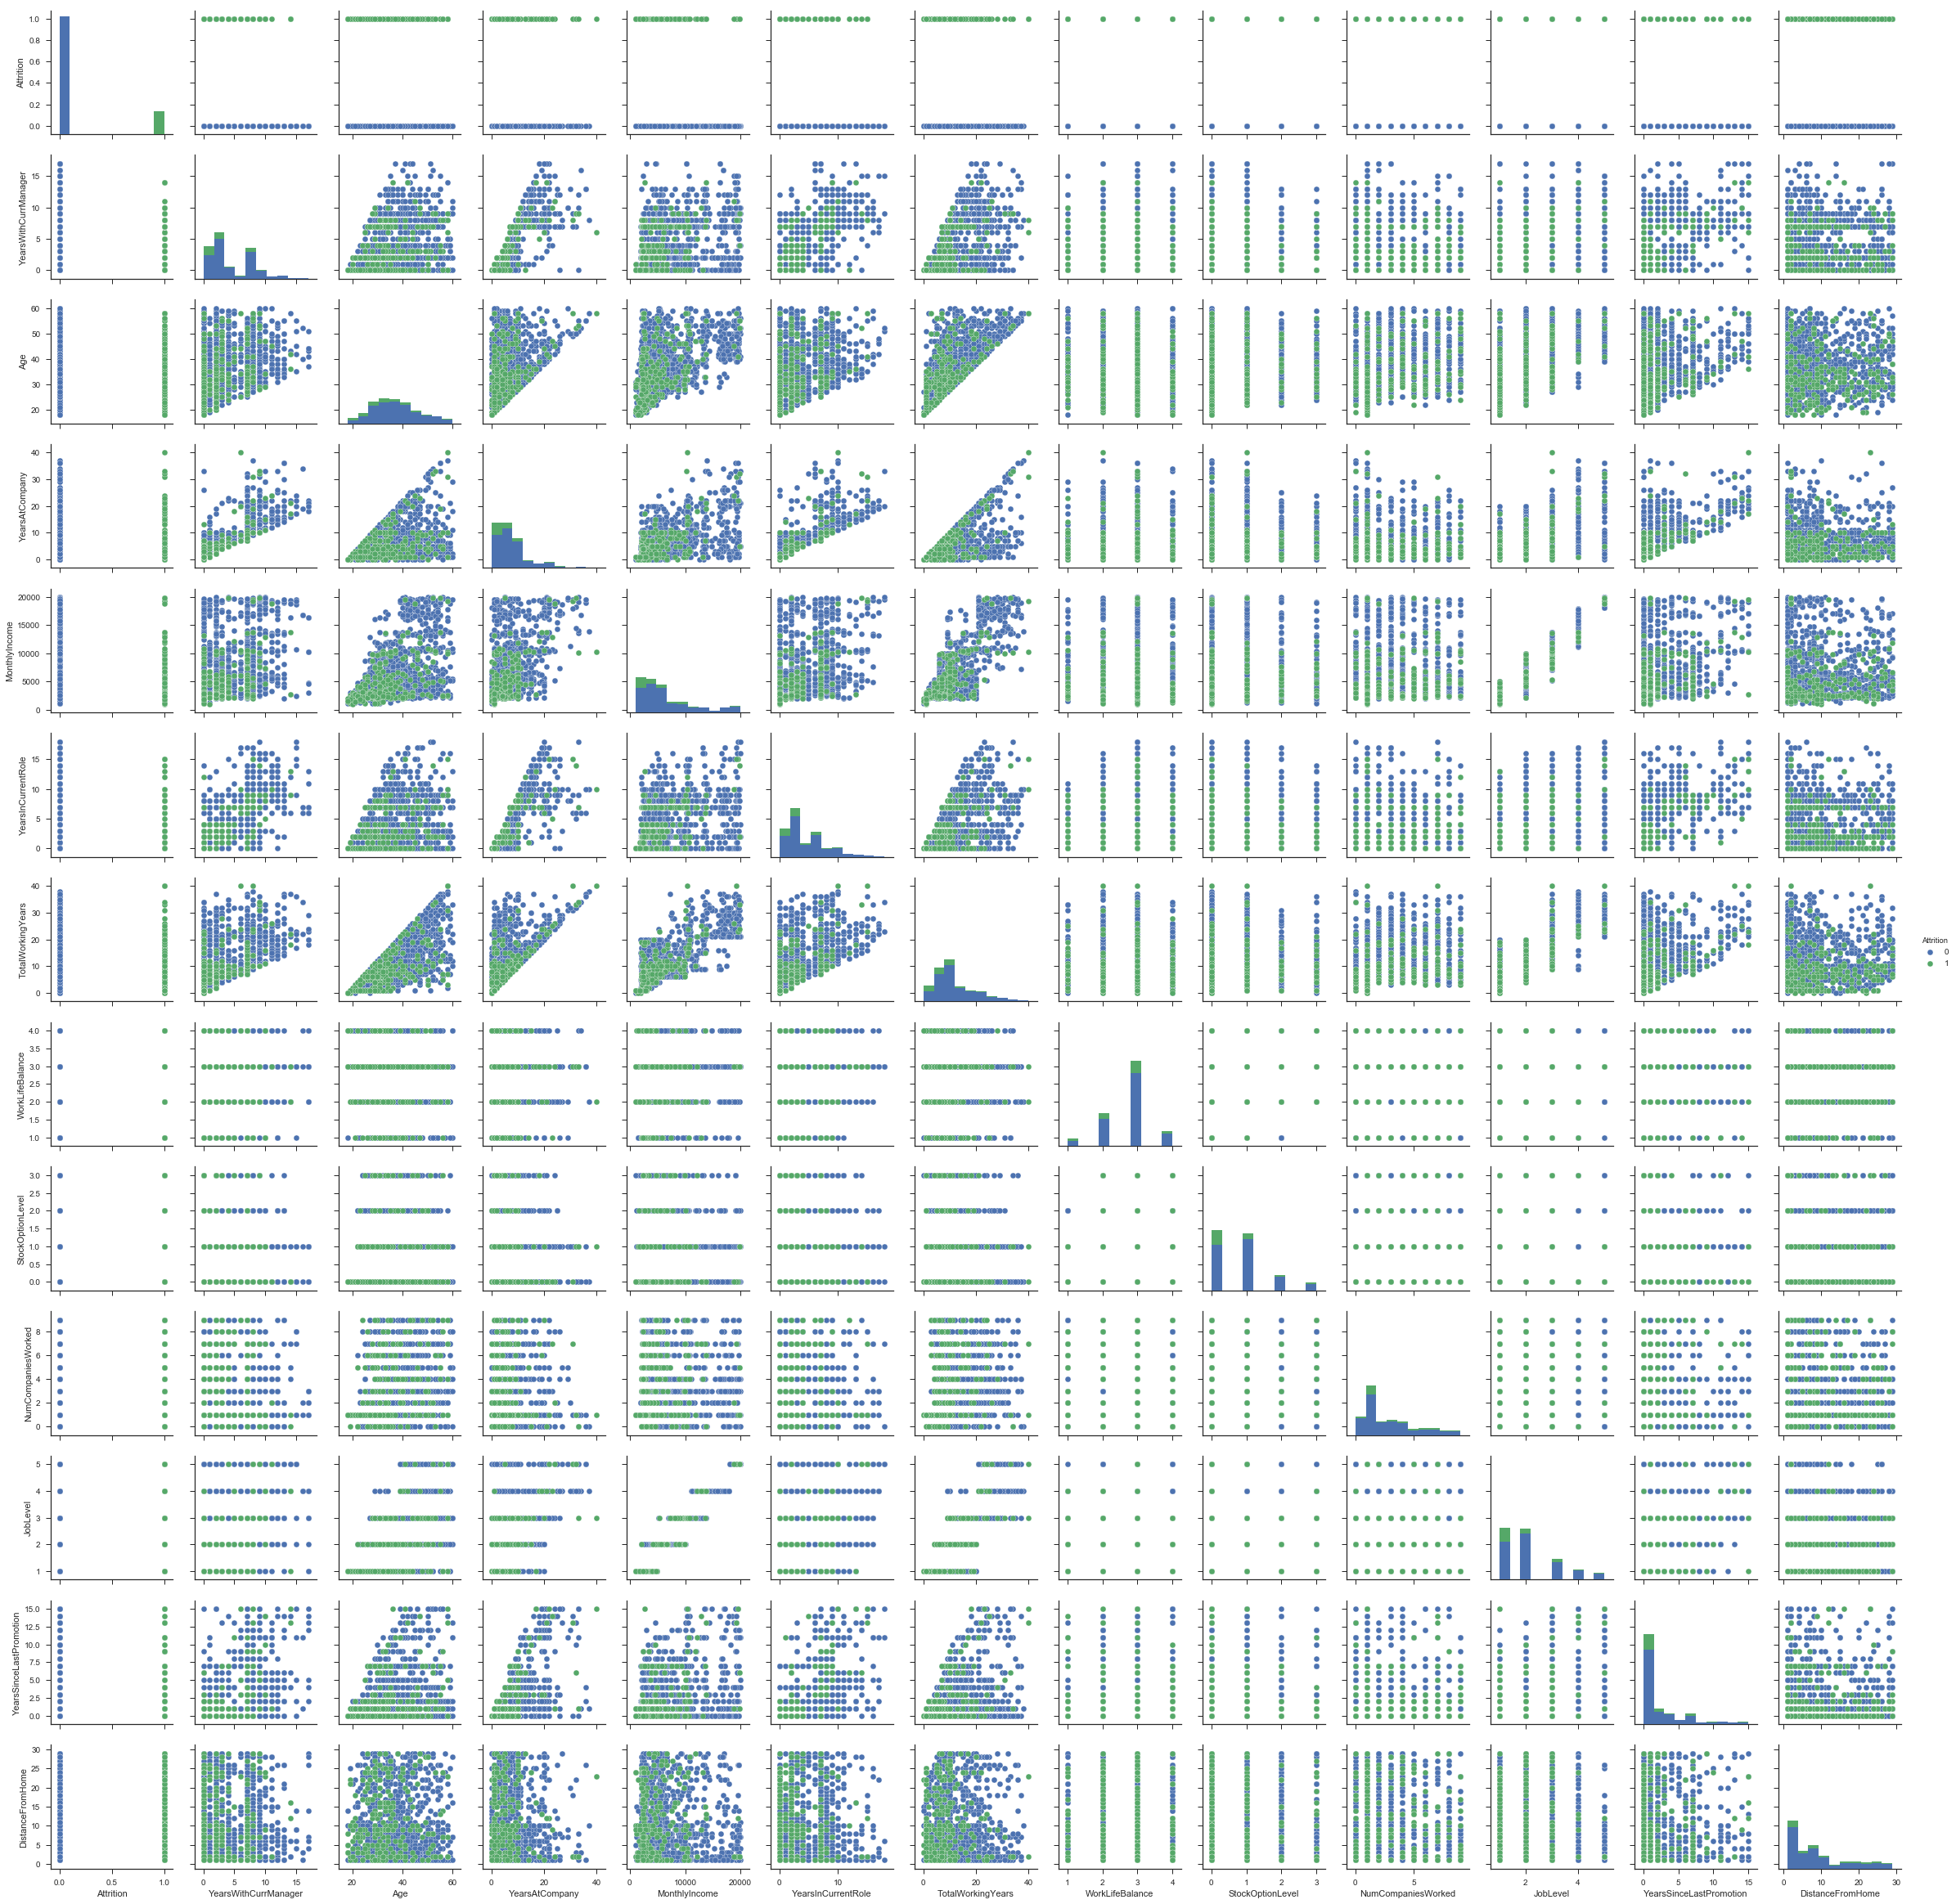

In [13]:
# Pairwise plots
# print ibm_df[['Attrition', 'MaritalStatus']]
ibm_df.Attrition  = pd.Categorical(ibm_df.Attrition).codes
ibm_df.MaritalStatus = pd.Categorical(ibm_df.MaritalStatus).codes

# Out of 35 columns these have some relations (Mentioned in ibm_analysis.txt)

columns_to_plot = ['Attrition', 'YearsWithCurrManager', 'Age', 'YearsAtCompany', 'MonthlyIncome', 
                   'YearsInCurrentRole', 'TotalWorkingYears', 'WorkLifeBalance', 'StockOptionLevel',
                  'NumCompaniesWorked', 'JobLevel', 'YearsSinceLastPromotion', 'DistanceFromHome']


g = sns.pairplot(ibm_df[columns_to_plot], hue='Attrition')
plt.show()


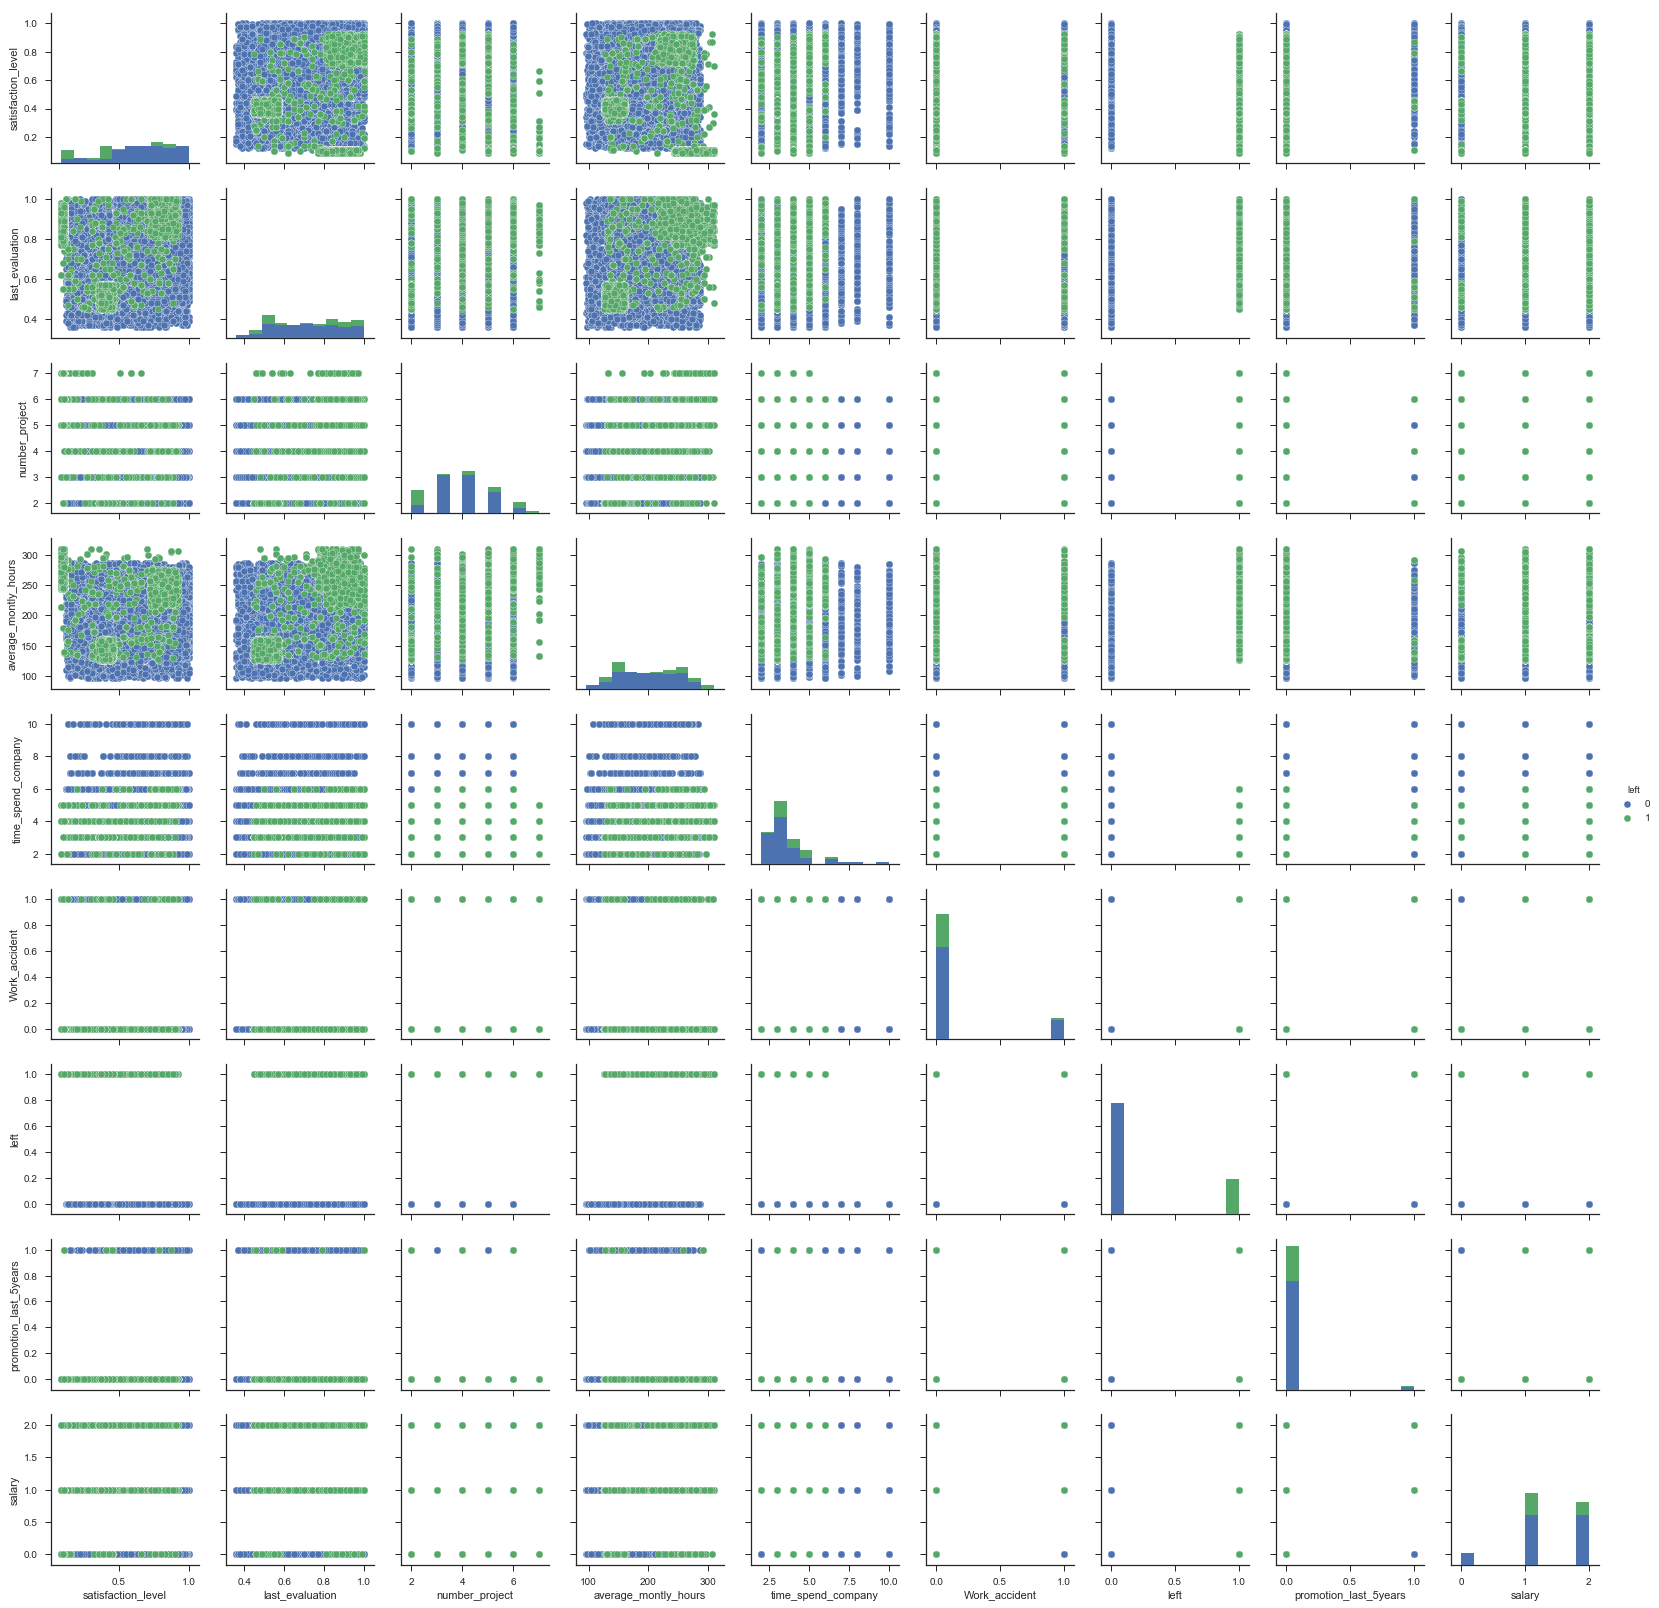

In [15]:
# EDA For XYZ Data
xyz_df = copy.deepcopy(xyz_data)
xyz_df.salary  = pd.Categorical(xyz_df.salary).codes
g = sns.pairplot(xyz_df, hue='left')
plt.show()

In [7]:
#Employee turn overs
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = xyz_df.groupby('left')
turnover_Summary.mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Correlation Matrix

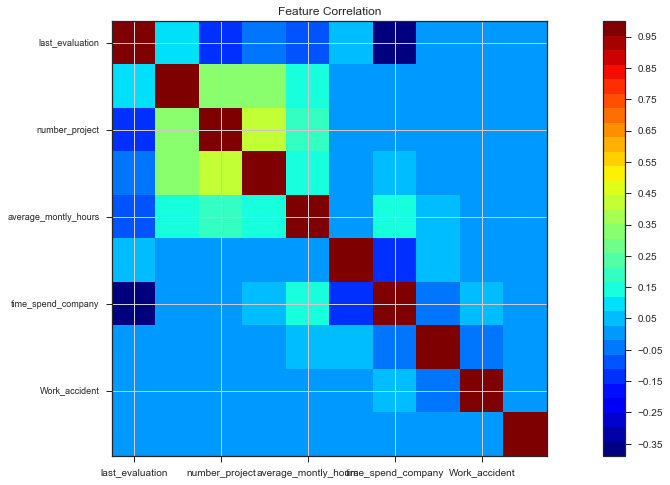

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm

def correlation_matrix(df):
    fig = plt.figure(figsize=(20, 8))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=10)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=np.arange(-0.75,1,0.1))
    plt.show()

correlation_matrix(xyz_df)

## Summary:

 From the heatmap, there is a positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

 For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.


## Salary vs TurnOver
### XYZ HR

Text(0.5,1,u'Employee Salary Turnover Distribution')

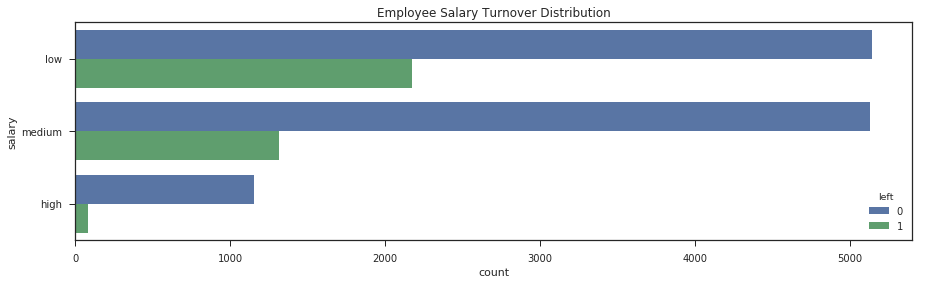

In [9]:

f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=xyz_df).set_title('Employee Salary Turnover Distribution')

### IBM HR


Text(0.5,1,u'Employee Salary Turnover Distribution for IBM')

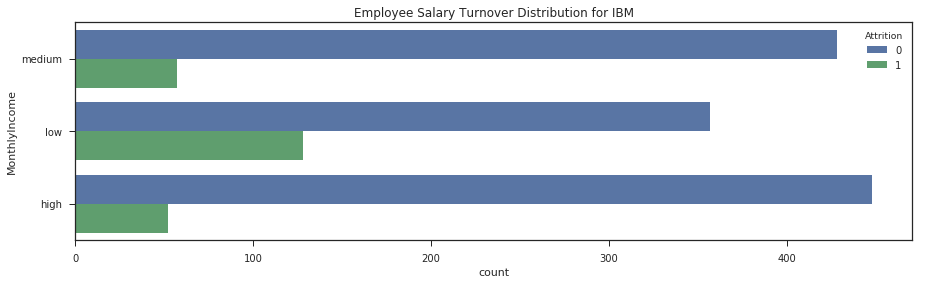

In [25]:
import numpy as np

ibm_cpy = copy.deepcopy(ibm_df)
low_sal = ibm_cpy['MonthlyIncome']

a = np.array(ibm_cpy['MonthlyIncome'])
low_range = np.percentile(a, 33) 
medium_range = np.percentile(a, 66)


def cat_to_sal(sal):
    if sal <= low_range:
        return 'low'
    elif sal >= low_range and sal < medium_range:
        return 'medium'
    elif sal >= medium_range:
        return 'high'
    
incomes = [cat_to_sal(x) for x in ibm_cpy['MonthlyIncome'].values]
ibm_cpy["MonthlyIncome"] = incomes


f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="MonthlyIncome", hue='Attrition', data=ibm_cpy).set_title('Employee Salary Turnover Distribution for IBM')


satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
left
promotion_last_5years
sales
salary


'Done'

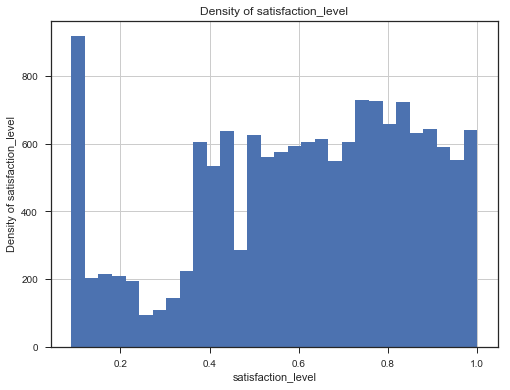

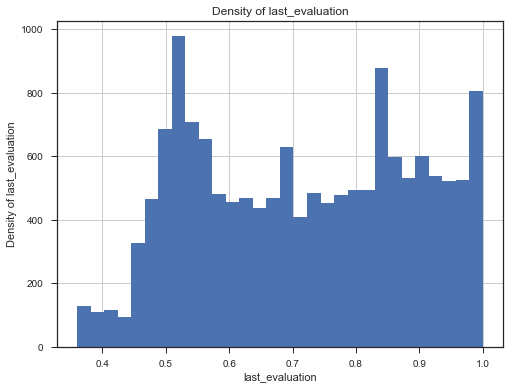

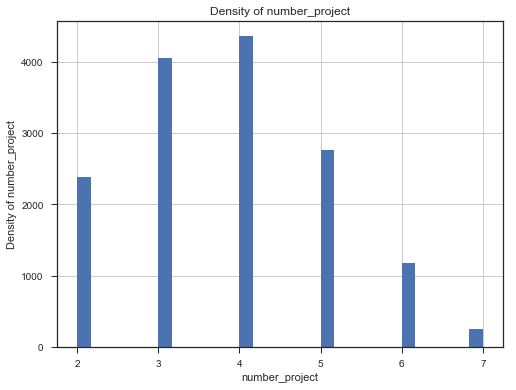

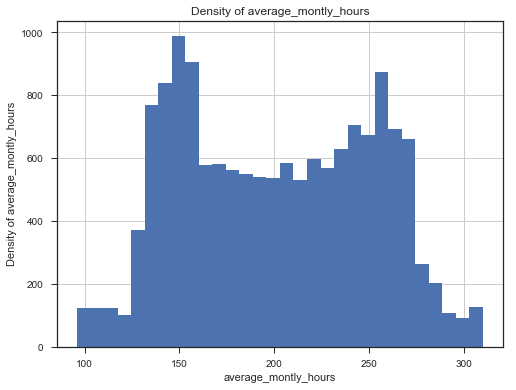

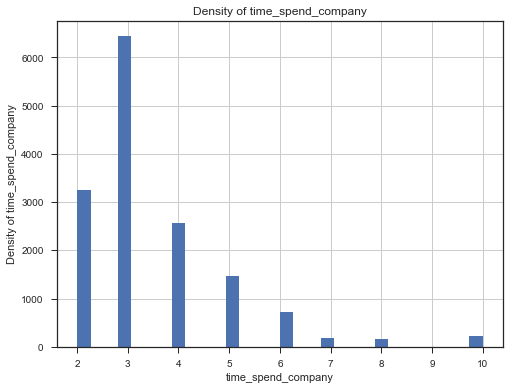

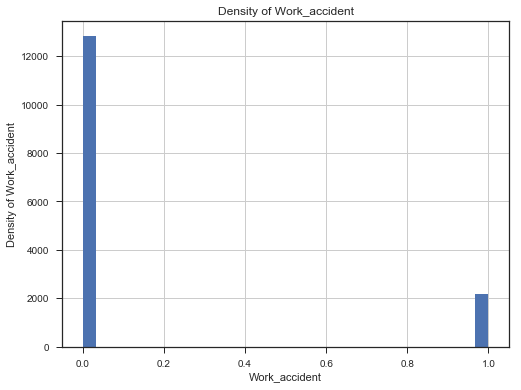

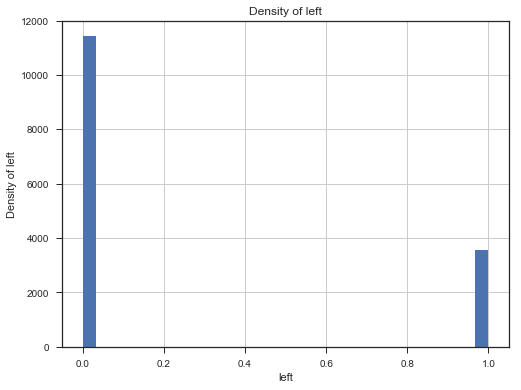

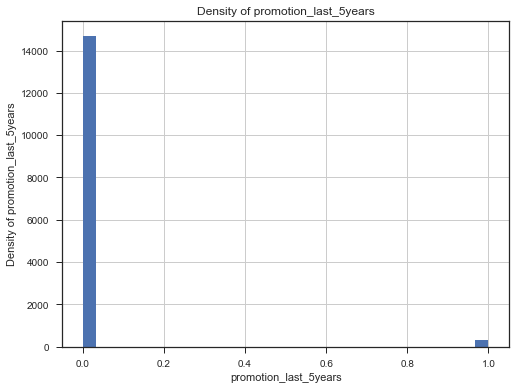

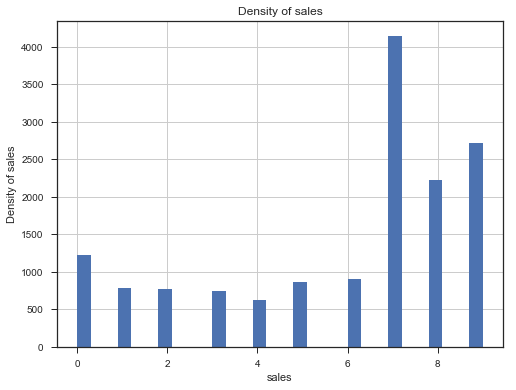

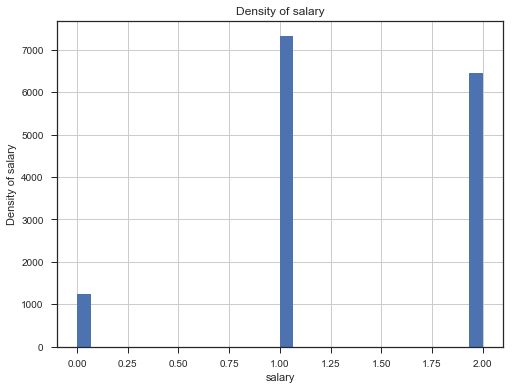

In [26]:
xyz_hist_cols = xyz_df.columns
def bike_hist(df, cols):    
    import matplotlib.pyplot as plt
    
    ## Loop over columns and plot histograms
    for col in cols:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df[col].hist(bins = 30, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Density of ' + col)
        ax.set_title('Density of ' + col) 
    
    return 'Done'

xyz_df.sales  = pd.Categorical(xyz_df.sales).codes
    
bike_hist(xyz_df, xyz_hist_cols)